<a href="https://colab.research.google.com/github/jazmichewcam/EDP1/blob/main/Membrana_jaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Resolucion de la ecuación de onda bidimensional**

 en un rectangulo de lados $a = 4$, $b = 2$,  condiciones iniciales dadas por una deflexion:

$$
f(x,y) = 0.1(4x - x^2)(2y - y^2)
$$

y velocidad inicial $g(x, y) = 0$.

Usamos separación de variables para obtener la solución




La forma de la ecuacion de onda en dos dimensiones es:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

el problema presenta las siguientes condiciones de frontera:

$$
u(0, y, t) = u(a, y, t) = u(x, 0, t) = u(x, b, t) = 0
$$


$$
u(x, y, 0) = f(x, y), \quad u_t(x, y, 0) = g(x, y)
$$

Donde despues de aplicar el metodo de separacion de variables llegamos a solución dada por

$$
u(x, y, t) = \sum_{m=1}^\infty \sum_{n=1}^\infty A_{mn} \sin\left(\frac{m\pi x}{a}\right) \sin\left(\frac{n\pi y}{b}\right) \cos\left(c\pi \sqrt{\left(\frac{m}{a}\right)^2 + \left(\frac{n}{b}\right)^2} \cdot t \right)
$$

Ahora los coeficientes $A_{mn}$ se obtienen como:

$$
A_{mn} = \frac{4}{ab} \int_0^a \int_0^b f(x, y) \sin\left(\frac{m\pi x}{a}\right) \sin\left(\frac{n\pi y}{b}\right) dx\,dy
$$


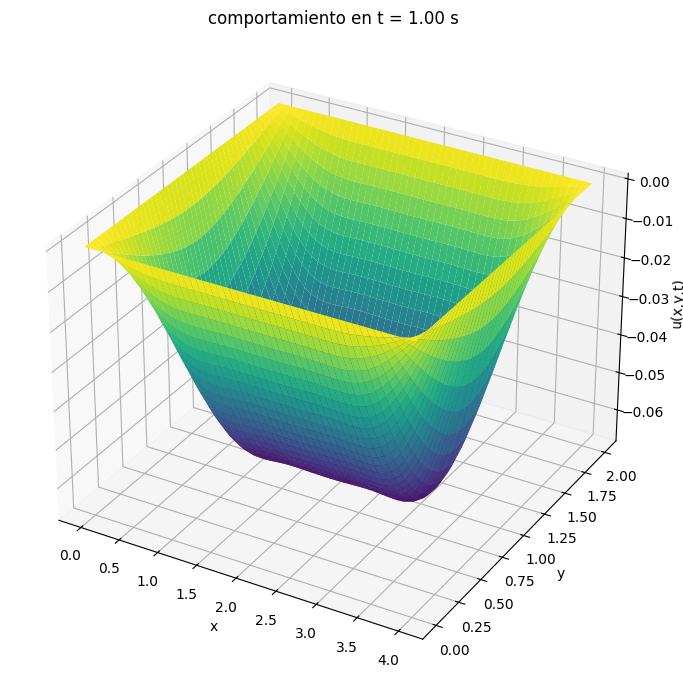

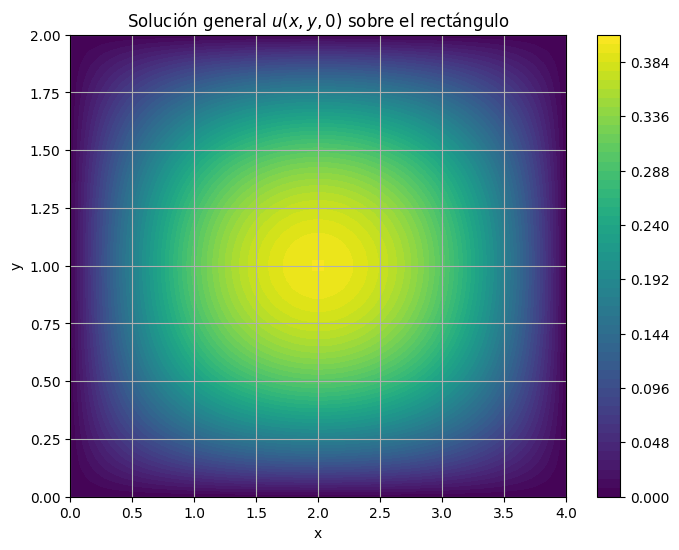

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Parámetros físicos y geométricos
a = 4  # Largo de la membrana en x
b = 2  # Largo en y
c = 1  # Velocidad de onda

# aroximacion de la seire doble
M = 10
N = 10

# Función f(x, y) definida por el problema
def f(x, y):
    return 0.1 * (4 * x - x**2) * (2 * y - y**2)

# Cálculo del coeficiente A_mn según:
def compute_A_mn(m, n):
    integrand = lambda y, x: f(x, y) * np.sin(m * np.pi * x / a) * np.sin(n * np.pi * y / b)
    result, _ = dblquad(integrand, 0, a, lambda x: 0, lambda x: b)
    return (4 / (a * b)) * result


# Crear malla para evaluar la solución
x = np.linspace(0, a, 50)
y = np.linspace(0, b, 50)
X, Y = np.meshgrid(x, y)

# Evaluar u(x, y, t) con la suma doble truncada
def u(X, Y, t):
    U = np.zeros_like(X)
    for m in range(1, M + 1):
        for n in range(1, N + 1):
            A_mn = compute_A_mn(m, n)
            omega_mn = c * np.pi * np.sqrt((m / a)**2 + (n / b)**2)
            term = A_mn * np.sin(m * np.pi * X / a) * np.sin(n * np.pi * Y / b) * np.cos(omega_mn * t)
            U += term
    return U



from mpl_toolkits.mplot3d import Axes3D

# Función para graficar la superficie 3D de u(x,y,t)
def plot_surface(t):
    Z = u(X, Y, t)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(f"comportamiento en t = {t:.2f} s")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x,y,t)')
    plt.tight_layout()
    plt.show()




# Mostrar el comportamiento de la membrana en varios instantes
for t in [1]:
    plot_surface(t)



# Graficar la solución u(x,y,0) sobre el plano (instantánea inicial)
Z0 = u(X, Y, t=0)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z0, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title("Solución general $u(x,y,0)$ sobre el rectángulo")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


# Personalización visual
ax.set_title("Solución general $u(x,y,0)$ sobre el rectángulo en el plano $xy$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u(x,y,0)")
ax.view_init(elev=30, azim=135)  # Vista oblicua para que se vea el plano
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()
